# W266 Project

### Adam Sayre & Erin Werner

## Single Layer Perceptron Model

In [1]:
import numpy as np
import csv
import pandas as pd 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import importlib
import emoji
import tensorflow as tf
import nltk
import re
from os import path
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
# Keras libraries
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session
import tensorflow.keras

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [4]:
data = pd.read_csv("~/Downloads/dataset(clean).csv") 
data.head()

,Emotion,Content,Original Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t..."
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...


In [5]:
data_e = pd.read_csv("~/Downloads/dataset(clean)_e.csv") 
data_e.head()[['Emotion','Content','Original Content','E_Content']]

,Emotion,Content,Original Content,E_Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...,rt usertaginstance usertaginstance oh fuck wro...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,feel shamed
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...,feeling little bit defeated steps faith would ...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t...",usertaginstance imagine reaction guy called jj...
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...,wouldnt feel burdened would live life testamen...


In [6]:
data_a = pd.read_csv("~/Downloads/dataset(clean)_a.csv") 
data_a.head()[['Emotion','Content','Original Content','A_Content']]

,Emotion,Content,Original Content,A_Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...,brt davbingodav mcrackins oh fuck did i wrote ...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,i feel nor am i shamed by it
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t...",bksiolajidebt imagine if that reaction guy tha...
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...


We can build the model, then pass each of our various cleaning methods through it.

In [7]:
# Some starting variables
vocab_size = 10000
max_length = 40

In [8]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(vocab_size, 8, input_length=max_length, embeddings_regularizer='l1'))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='relu'))
emb_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
emb_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 963       
Total params: 80,963
Trainable params: 80,963
Non-trainable params: 0
_________________________________________________________________


#### Original Cleaned Data

In [10]:
possible_labels = data.Emotion.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'disappointed': 0, 'happy': 1, 'angry': 2}

In [11]:
data['label'] = data.Emotion.replace(label_dict)

In [12]:
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(data.Content.values, data.label.values, test_size=0.3, 
                                                  random_state=42, stratify=data.label.values)

In [13]:
tokenizer_c = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n', lower=True, split = " ")
tokenizer_c.fit_on_texts(X_train_c)

X_train_seq_c = tokenizer_c.texts_to_sequences(X_train_c)
X_train_seq_trunc_c = pad_sequences(X_train_seq_c, maxlen=max_length)

X_val_seq_c = tokenizer_c.texts_to_sequences(X_val_c)
X_val_seq_trunc_c = pad_sequences(X_val_seq_c, maxlen=max_length)

In [14]:
# Encoding output variable
le_c = LabelEncoder()

y_train_le_c = le_c.fit_transform(y_train_c)
y_train_emb_c = to_categorical(y_train_le_c)

y_val_le_c = le_c.transform(y_val_c)
y_val_emb_c = to_categorical(y_val_le_c)

In [15]:
emb_model.reset_states()
clear_session()
emb_model.fit(X_train_seq_trunc_c, y_train_emb_c, epochs=5)

Epoch 1/5
20051/20051 [==============================] - 34s 2ms/step - loss: nan - accuracy: 0.3430
Epoch 2/5
20051/20051 [==============================] - 34s 2ms/step - loss: nan - accuracy: 0.3423
Epoch 3/5
20051/20051 [==============================] - 33s 2ms/step - loss: nan - accuracy: 0.3414
Epoch 4/5
20051/20051 [==============================] - 33s 2ms/step - loss: nan - accuracy: 0.3423
Epoch 5/5
20051/20051 [==============================] - 43s 2ms/step - loss: nan - accuracy: 0.3419


In [16]:
percp_loss_c, percp_accuracy_c = emb_model.evaluate(X_train_seq_trunc_c, y_train_emb_c, verbose=False)
print("Training Accuracy: {:.4f}".format(percp_accuracy_c))
percp_loss_c_val, percp_accuracy_c_val = emb_model.evaluate(X_val_seq_trunc_c, y_val_emb_c, verbose=False)
print("Validation Accuracy:  {:.4f}".format(percp_accuracy_c_val))

Training Accuracy: 0.3423
Validation Accuracy:  0.3423


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


8593/8593 [==============================] - 6s 665us/step


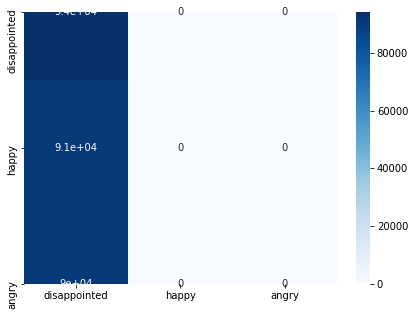

In [17]:
y_pred_c = emb_model.predict_classes(X_val_seq_trunc_c, verbose=1)
cm_c = confusion_matrix(y_val_c, y_pred_c)
plt.figure(figsize=(7,5))
sn.heatmap(cm_c, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels, yticklabels=possible_labels)

#### Original Uncleaned Data

In [18]:
data["Original_Content"] = data["Original Content"]

In [19]:
X_train_oc, X_val_oc, y_train_oc, y_val_oc = train_test_split(data.Original_Content.values, data.label.values, 
                                                  test_size=0.3, random_state=42, stratify = data.label.values)

In [20]:
tokenizer_oc = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n', lower=True, split = " ")
tokenizer_oc.fit_on_texts(X_train_oc)

X_train_seq_oc = tokenizer_oc.texts_to_sequences(X_train_oc)
X_train_seq_trunc_oc = pad_sequences(X_train_seq_oc, maxlen=max_length)

X_val_seq_oc = tokenizer_oc.texts_to_sequences(X_val_oc)
X_val_seq_trunc_oc = pad_sequences(X_val_seq_oc, maxlen=max_length)

In [21]:
# Encoding output variable
le_oc = LabelEncoder()

y_train_le_oc = le_oc.fit_transform(y_train_oc)
y_train_emb_oc = to_categorical(y_train_le_oc)

y_val_le_oc = le_oc.transform(y_val_oc)
y_val_emb_oc = to_categorical(y_val_le_oc)

In [22]:
emb_model.reset_states()
clear_session()
emb_model.fit(X_train_seq_trunc_oc, y_train_emb_oc, epochs=5)

Epoch 1/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 2/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 3/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 4/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 5/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423


In [23]:
percp_loss_oc, percp_accuracy_oc = emb_model.evaluate(X_train_seq_trunc_oc, y_train_emb_oc, verbose=False)
print("Training Accuracy: {:.4f}".format(percp_accuracy_oc))
percp_loss_oc_val, percp_accuracy_oc_val = emb_model.evaluate(X_val_seq_trunc_oc, y_val_emb_oc, verbose=False)
print("Validation Accuracy:  {:.4f}".format(percp_accuracy_oc_val))

Training Accuracy: 0.3423
Validation Accuracy:  0.3423


  81/8593 [..............................] - ETA: 5s   

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


8593/8593 [==============================] - 6s 668us/step


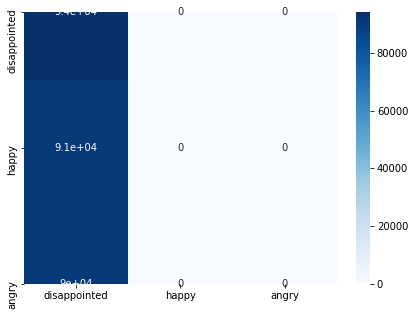

In [24]:
y_pred_oc = emb_model.predict_classes(X_val_seq_trunc_oc, verbose=1)
cm_oc = confusion_matrix(y_val_oc, y_pred_oc)
plt.figure(figsize=(7,5))
sn.heatmap(cm_oc, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels, yticklabels=possible_labels)

#### Custom Cleaned Data #1

In [25]:
possible_labels_e = data_e.Emotion.unique()

label_dict_e = {}
for index, possible_label in enumerate(possible_labels_e):
    label_dict_e[possible_label] = index
label_dict_e

{'disappointed': 0, 'happy': 1, 'angry': 2}

In [26]:
data_e['label'] = data_e.Emotion.replace(label_dict_e)

In [27]:
X_train_e, X_val_e, y_train_e, y_val_e = train_test_split(data_e.E_Content.values, data_e.label.values, 
                                                  test_size=0.30,random_state=42, stratify=data_e.label.values)

In [28]:
tokenizer_e = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n', lower=True, split = " ")
tokenizer_e.fit_on_texts(X_train_e)

X_train_seq_e = tokenizer_e.texts_to_sequences(X_train_e)
X_train_seq_trunc_e = pad_sequences(X_train_seq_e, maxlen=max_length)

X_val_seq_e = tokenizer_e.texts_to_sequences(X_val_e)
X_val_seq_trunc_e = pad_sequences(X_val_seq_e, maxlen=max_length)

In [29]:
# Encoding output variable
le_e = LabelEncoder()

y_train_le_e = le_e.fit_transform(y_train_e)
y_train_emb_e = to_categorical(y_train_le_e)

y_val_le_e = le_e.transform(y_val_e)
y_val_emb_e = to_categorical(y_val_le_e)

In [30]:
emb_model.reset_states()
clear_session()
emb_model.fit(X_train_seq_trunc_e, y_train_emb_e, epochs=5)

Epoch 1/5
20051/20051 [==============================] - 30s 2ms/step - loss: nan - accuracy: 0.3423
Epoch 2/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 3/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 4/5
20051/20051 [==============================] - 28s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 5/5
20051/20051 [==============================] - 28s 1ms/step - loss: nan - accuracy: 0.3423


In [31]:
percp_loss_e, percp_accuracy_e = emb_model.evaluate(X_train_seq_trunc_e, y_train_emb_e, verbose=False)
print("Training Accuracy: {:.4f}".format(percp_accuracy_e))
percp_loss_e_val, percp_accuracy_e_val = emb_model.evaluate(X_val_seq_trunc_e, y_val_emb_e, verbose=False)
print("Validation Accuracy:  {:.4f}".format(percp_accuracy_e_val))

Training Accuracy: 0.3423
Validation Accuracy:  0.3423


   1/8593 [..............................] - ETA: 16:02

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


8593/8593 [==============================] - 6s 667us/step


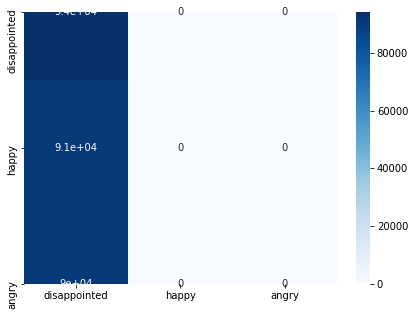

In [32]:
y_pred_e = emb_model.predict_classes(X_val_seq_trunc_e, verbose=1)
cm_e = confusion_matrix(y_val_e, y_pred_e)
plt.figure(figsize=(7,5))
sn.heatmap(cm_e, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels_e, yticklabels=possible_labels_e)

#### Custom Cleaned Data #2

In [33]:
#read from dataframe
possible_labels_a = data_a.Emotion.unique()

label_dict_a = {}
for index, possible_label in enumerate(possible_labels_a):
    label_dict_a[possible_label] = index
label_dict_a
data_a['label'] = data_a.Emotion.replace(label_dict_a)

In [34]:
X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(data_a.A_Content.values, data_a.label.values, 
                                                  test_size=0.30,random_state=42, stratify=data_a.label.values)

In [35]:
tokenizer_a = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n', lower=True, split = " ")
tokenizer_a.fit_on_texts(X_train_a)

X_train_seq_a = tokenizer_a.texts_to_sequences(X_train_a)
X_train_seq_trunc_a = pad_sequences(X_train_seq_a, maxlen=max_length)

X_val_seq_a = tokenizer_a.texts_to_sequences(X_val_a)
X_val_seq_trunc_a = pad_sequences(X_val_seq_a, maxlen=max_length)

In [36]:
# Encoding output variable
le_a = LabelEncoder()

y_train_le_a = le_a.fit_transform(y_train_a)
y_train_emb_a = to_categorical(y_train_le_a)

y_val_le_a = le_e.transform(y_val_a)
y_val_emb_a = to_categorical(y_val_le_a)

In [37]:
emb_model.reset_states()
clear_session()
emb_model.fit(X_train_seq_trunc_a, y_train_emb_a, epochs=5)

Epoch 1/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 2/5
20051/20051 [==============================] - 28s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 3/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 4/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423
Epoch 5/5
20051/20051 [==============================] - 29s 1ms/step - loss: nan - accuracy: 0.3423


In [38]:
percp_loss_a, percp_accuracy_a = emb_model.evaluate(X_train_seq_trunc_a, y_train_emb_a, verbose=False)
print("Training Accuracy: {:.4f}".format(percp_accuracy_a))
percp_loss_a_val, percp_accuracy_a_val = emb_model.evaluate(X_val_seq_trunc_a, y_val_emb_a, verbose=False)
print("Validation Accuracy:  {:.4f}".format(percp_accuracy_a_val))

Training Accuracy: 0.3423
Validation Accuracy:  0.3423


 169/8593 [..............................] - ETA: 5s

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


8593/8593 [==============================] - 6s 717us/step


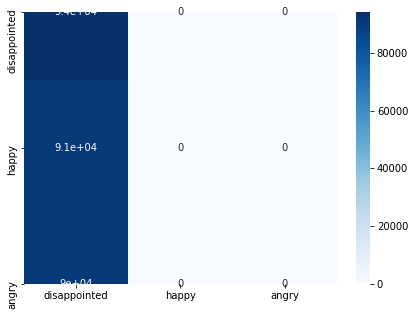

In [39]:
y_pred_a = emb_model.predict_classes(X_val_seq_trunc_a, verbose=1)
cm_a = confusion_matrix(y_val_a, y_pred_a)
plt.figure(figsize=(7,5))
sn.heatmap(cm_a, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels_a, yticklabels=possible_labels_a)

#### Results

In [40]:
p_acc = [percp_accuracy_oc, percp_accuracy_c, percp_accuracy_e, percp_accuracy_a]
#p_loss = [percp_loss_oc, percp_loss_c, percp_loss_e, percp_loss_a]
p_values = ['Orig. Uncleaned', 'Orig. Cleaned', 'Custom Cleaned #1', 'Custom Cleaned #2']
p_df = pd.DataFrame()
p_df['Cleaning Method'] = p_values
p_df['F1 Score'] = p_acc
#p_df['Loss'] = p_loss
p_df

,Cleaning Method,F1 Score
0,Orig. Uncleaned,0.342268
1,Orig. Cleaned,0.342268
2,Custom Cleaned #1,0.342268
3,Custom Cleaned #2,0.342268
